In [794]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pour le pre processing
from utils import spherical_dist
from utils import transform_into_bins
from sklearn.preprocessing import MinMaxScaler

# pour PCA 
from sklearn.decomposition import PCA

# pour le Clustering
from sklearn.cluster import KMeans


In [795]:
### pour afficher toutes les lignes
pd.set_option('display.max_row', 111)

###### pour afficher toutes les colonnes
pd.set_option('display.max_column', 111)

In [796]:
path = 'clean_data/master_salary.csv'
master_salary = pd.read_csv(path)
df = master_salary.copy()
df.head()


,codgeo,libgeo,salaire_moyen,salaire_moyen_cad,salaire_moyen_prof_int,salaire_moyen_emp,salaire_moyen_ouv,salaire_moyen_fem,salaire_moyen_fem_cad,salaire_moyen_fem_prof_int,salaire_moyen_fem_emp,salaire_moyen_fem_ouv,salaire_moyen_hom,salaire_moyen_hom_cad,salaire_moyen_hom_prof_int,salaire_moyen_hom_emp,salaire_moyen_hom_ouv,salaire_moyen_18-26,salaire_moyen_26-50,salaire_moyen_50+,salaire_moyen_fem_18-26,salaire_moyen_fem_26-50,salaire_moyen_fem_50+,salaire_moyen_hom_18-26,salaire_moyen_hom_26-50,salaire_moyen_hom_50+,numero_departement,code_region,nom_region,chef.lieu_region,latitude,longitude,nb_ent,nb_ent_0,nb_ent_1-5,nb_ent_6-10,nb_ent_11-20,nb_ent_21-50,nb_ent_51-99,nb_ent_100-199,nb_ent_200-499,nb_ent_500+,pop_total,pop_age_0-5,pop_age_5-10,pop_age_10-15,pop_age_15-20,pop_age_20-25,pop_age_25-30,pop_age_30-35,pop_age_35-40,pop_age_40-45,pop_age_45-50,pop_age_50-55,pop_age_55-60,pop_age_60-65,pop_age_65-70,pop_age_70-75,pop_age_75-80,pop_age_80+,pop_sexe_homme,pop_sexe_femme,pop_mode_cohabitation_enfant_dun_couple,pop_mode_cohabitation_enfant_dune_famille_monoparentale,pop_mode_cohabitation_adulte_dun_couple_sans_enfant,pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s),pop_mode_cohabitation_adulte_dune_famille_monoparentale,pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes,pop_mode_cohabitation_personne_vivant_seule,libelle_commune,code_departement,nombre_de_points_total,consommation_totale,nombre_de_points_filiere_electricité,consommation_filiere_electricité,nombre_de_points_filiere_gaz,consommation_filiere_gaz,nombre_de_points_libelle_categorie_consommation_entreprises,consommation_libelle_categorie_consommation_entreprises,nombre_de_points_libelle_categorie_consommation_non renseigne,consommation_libelle_categorie_consommation_non renseigne,nombre_de_points_libelle_categorie_consommation_petits professionels,consommation_libelle_categorie_consommation_petits professionels,nombre_de_points_libelle_categorie_consommation_résidentiel,consommation_libelle_categorie_consommation_résidentiel,nombre_de_points_libelle_categorie_consommation_résidentiel + petits professionnels,consommation_libelle_categorie_consommation_résidentiel + petits professionnels,nombre_de_points_libelle_grand_secteur_agriculture,consommation_libelle_grand_secteur_agriculture,nombre_de_points_libelle_grand_secteur_industrie,consommation_libelle_grand_secteur_industrie,nombre_de_points_libelle_grand_secteur_secteur inconnu,consommation_libelle_grand_secteur_secteur inconnu,nombre_de_points_libelle_grand_secteur_tertiaire,consommation_libelle_grand_secteur_tertiaire,nombre_de_points_libelle_grand_secteur_résidentiel,consommation_libelle_grand_secteur_résidentiel,max_conso,max_conso_secteur,distance_to_chef_lieu
0,1004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,10.1,9.6,15.0,26.4,16.7,11.0,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6,1,82.0,Rhône-Alpes,Lyon,45.950000,5.350000,996.0,577.0,272.0,63.0,46.0,24.0,9.0,3.0,2.0,0.0,13460.0,1023.0,809.0,871.0,901.0,824.0,1057.0,913.0,828.0,839.0,903.0,823.0,815.0,737.0,621.0,449.0,410.0,637.0,6477.0,6983.0,2885.0,1026.0,3196.0,3080.0,642.0,390.0,2241.0,Ambérieu-en-Bugey,1.0,103418.0,1.269513e+06,76099.0,663813.915433,27319.0,605698.721551,1150.0,357961.841629,5.0,1054.318333,2853.0,44932.941730,21649.0,160040.955292,77761.0,705522.58,0.0,0.000000,335.0,38951.348807,468.0,4785.467174,3205.0,360212.285712,99410.0,865563.535292,360212.285712,1,44.647413
1,1007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,10.6,10.0,14.7,23.3,15.8,11.3,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4,1,82.0,Rhône-Alpes,Lyon,46.000000,5.350000,124.0,87.0,20.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,2563.0,200.0,230.0,130.0,115.0,85.0,155.0,185.0,149.0,240.0,179.0,165.0,185.0,160.0,100.0,105.0,90.0,90.0,1229.0,1334.0,635.0,135.0,600.0,700.0,90.0,135.0,268.0,Ambronay,1.0,13684.0,1.411495e+05,12410.0,102191.467309,1274.0,38958.019271,113.0,17077.014544,0.0,0.000000,316.0,4207.201462,

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4631 entries, 0 to 4630
Data columns (total 100 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   codgeo                                                                                    4631 non-null   int64  
 1   libgeo                                                                                    4631 non-null   object 
 2   salaire_moyen                                                                             4631 non-null   float64
 3   salaire_moyen_cad                                                                         4631 non-null   float64
 4   salaire_moyen_prof_int                                                                    4631 non-null   float64
 5   salaire_moyen_emp                                     

# 1 - Filtrage des communes à ?km de Lyon et Lyon exclu

In [798]:
# selection de la zone géographique à considérer
# calcul de la distance entre la Lyon et les autres communes
# exclusion de Lyon et sélection des communes situées à moins ?km de Lyon

In [799]:
commune = 'Lyon'   # définit Lyon comme centre de cercle
distance = 150      # distance  max  à Lyon

# mise en oeuvre de la fonction spherical_dist de utils permettant de calculer la distance en 2 communes 
# grâce aux longitudes et latitudes de chaque commune 

position1 = df[['latitude', 'longitude']].values
position2 = df[df['libelle_commune'] == commune][['latitude', 'longitude']].values[0, :]

distance_to_Lyon = spherical_dist(position1, position2)
df2 = df.assign(distance_to_Lyon = distance_to_Lyon)

# exclusion de Lyon
df2 = df2[df2['libelle_commune'] != commune]

# sélection des communes dans un périmètre de rayon =  150 km autour de Lyon 
df_lyon = df2[df2['distance_to_Lyon']<distance]

print(df_lyon.shape)
df_lyon.head()

# la zone considérée comprend 1413 communes

df_lyon_sorted = df_lyon.sort_values('pop_total', ascending  = False)
df_lyon_sorted.iloc[0:5, 1:20]



df_lyon.sort_values('pop_total', ascending = False).head(10)

(660, 101)


,codgeo,libgeo,salaire_moyen,salaire_moyen_cad,salaire_moyen_prof_int,salaire_moyen_emp,salaire_moyen_ouv,salaire_moyen_fem,salaire_moyen_fem_cad,salaire_moyen_fem_prof_int,salaire_moyen_fem_emp,salaire_moyen_fem_ouv,salaire_moyen_hom,salaire_moyen_hom_cad,salaire_moyen_hom_prof_int,salaire_moyen_hom_emp,salaire_moyen_hom_ouv,salaire_moyen_18-26,salaire_moyen_26-50,salaire_moyen_50+,salaire_moyen_fem_18-26,salaire_moyen_fem_26-50,salaire_moyen_fem_50+,salaire_moyen_hom_18-26,salaire_moyen_hom_26-50,salaire_moyen_hom_50+,numero_departement,code_region,nom_region,chef.lieu_region,latitude,longitude,nb_ent,nb_ent_0,nb_ent_1-5,nb_ent_6-10,nb_ent_11-20,nb_ent_21-50,nb_ent_51-99,nb_ent_100-199,nb_ent_200-499,nb_ent_500+,pop_total,pop_age_0-5,pop_age_5-10,pop_age_10-15,pop_age_15-20,pop_age_20-25,pop_age_25-30,pop_age_30-35,pop_age_35-40,pop_age_40-45,pop_age_45-50,pop_age_50-55,pop_age_55-60,pop_age_60-65,pop_age_65-70,pop_age_70-75,pop_age_75-80,pop_age_80+,pop_sexe_homme,pop_sexe_femme,pop_mode_cohabitation_enfant_dun_couple,pop_mode_cohabitation_enfant_dune_famille_monoparentale,pop_mode_cohabitation_adulte_dun_couple_sans_enfant,pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s),pop_mode_cohabitation_adulte_dune_famille_monoparentale,pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes,pop_mode_cohabitation_personne_vivant_seule,libelle_commune,code_departement,nombre_de_points_total,consommation_totale,nombre_de_points_filiere_electricité,consommation_filiere_electricité,nombre_de_points_filiere_gaz,consommation_filiere_gaz,nombre_de_points_libelle_categorie_consommation_entreprises,consommation_libelle_categorie_consommation_entreprises,nombre_de_points_libelle_categorie_consommation_non renseigne,consommation_libelle_categorie_consommation_non renseigne,nombre_de_points_libelle_categorie_consommation_petits professionels,consommation_libelle_categorie_consommation_petits professionels,nombre_de_points_libelle_categorie_consommation_résidentiel,consommation_libelle_categorie_consommation_résidentiel,nombre_de_points_libelle_categorie_consommation_résidentiel + petits professionnels,consommation_libelle_categorie_consommation_résidentiel + petits professionnels,nombre_de_points_libelle_grand_secteur_agriculture,consommation_libelle_grand_secteur_agriculture,nombre_de_points_libelle_grand_secteur_industrie,consommation_libelle_grand_secteur_industrie,nombre_de_points_libelle_grand_secteur_secteur inconnu,consommation_libelle_grand_secteur_secteur inconnu,nombre_de_points_libelle_grand_secteur_tertiaire,consommation_libelle_grand_secteur_tertiaire,nombre_de_points_libelle_grand_secteur_résidentiel,consommation_libelle_grand_secteur_résidentiel,max_conso,max_conso_secteur,distance_to_chef_lieu,distance_to_Lyon
1766,42218,Saint-Étienne,12.6,22.5,13.8,10.2,10.5,11.4,19.5,12.8,10.0,8.9,13.4,23.8,14.5,10.6,10.9,9.6,12.4,14.7,9.2,11.3,12.7,9.9,13.1,16.2,42,82.0,Rhône-Alpes,Lyon,45.433333,4.400000,11663.0,7251.0,3046.0,523.0,440.0,252.0,82.0,48.0,16.0,5.0,166137.0,10573.0,9420.0,8613.0,10957.0,14118.0,11793.0,10997.0,9495.0,9534.0,9419.0,9386.0,9423.0,9206.0,8479.0,6533.0,6894.0,11297.0,78958.0,87179.0,31411.0,11974.0,36549.0,31938.0,7363.0,7071.0,39831.0,Saint-Étienne,42.0,1473745.0,1.796770e+07,984468.0,6.211683e+06,489277.0,1.175602e+07,15080.0,6.479885e+06,427.0,2.296060e+05,32439.0,450744.450439,291531.0,2.119763e+06,1134268.0,8687704.50,12.0,1889.007574,4209.0,1.587508e+06,6878.0,303041.558068,36847.0,5.267797e+06,1425799.0,1.080747e+07,5.267797e+06,1,49.646994,49.646994
1573,38185,Grenoble,14.7,22.6,13.9,10.5,11.1,13.0,20.4,13.1,10.3,9.3,15.8,23.6,14.6,10.8,11.5,10.3,14.9,17.4,9.7,13.4,14.5,10.7,15.7,19.6,38,82.0,Rhône-Alpes,Lyon,45.166667,5.716667,13207.0,8620.0,3285.0,574.0,384.0,229.0,54.0,35.0,13.0,13.0,157802.0,9649.0,7959.0,7011.0,10358.0,21141.0,15146.0,12736.0,10061.0,9326.0,7940.0,7702.0,7310.0,6925.0,6348.0,4873.0,4551.0,8766.0,75885.0,81917.0,24972.0,10753.0,32157.0,26822.0,6897.

In [800]:
df_lyon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 3575
Columns: 101 entries, codgeo to distance_to_Lyon
dtypes: float64(94), int64(3), object(4)
memory usage: 525.9+ KB


In [801]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['codgeo', 'numero_departement', 'max_conso_secteur'], float64: ['salaire_moyen', 'salaire_moyen_cad', 'salaire_moyen_prof_int', 'salaire_moyen_emp', 'salaire_moyen_ouv', 'salaire_moyen_fem', 'salaire_moyen_fem_cad', 'salaire_moyen_fem_prof_int', 'salaire_moyen_fem_emp', 'salaire_moyen_fem_ouv', 'salaire_moyen_hom', 'salaire_moyen_hom_cad', 'salaire_moyen_hom_prof_int', 'salaire_moyen_hom_emp', 'salaire_moyen_hom_ouv', 'salaire_moyen_18-26', 'salaire_moyen_26-50', 'salaire_moyen_50+', 'salaire_moyen_fem_18-26', 'salaire_moyen_fem_26-50', 'salaire_moyen_fem_50+', 'salaire_moyen_hom_18-26', 'salaire_moyen_hom_26-50', 'salaire_moyen_hom_50+', 'code_region', 'latitude', 'longitude', 'nb_ent', 'nb_ent_0', 'nb_ent_1-5', 'nb_ent_6-10', 'nb_ent_11-20', 'nb_ent_21-50', 'nb_ent_51-99', 'nb_ent_100-199', 'nb_ent_200-499', 'nb_ent_500+', 'pop_total', 'pop_age_0-5', 'pop_age_5-10', 'pop_age_10-15', 'pop_age_15-20', 'pop_age_20-25', 'pop_age_25-30', 'pop_age_30-35', 'pop_age_35-40', 'pop_age

In [802]:
#
# nouvelles lignes  = plutôt que les valeurs brutes des catégories pour 
# "nbr d'entreprises" ; "population", on calcul les part représentées par chacune des catégories : 

# 1 - pour entreprises et nbr d'entreprises par taille (nbr de salariés) 
for col in df_lyon.columns:
    if 'nb_ent_' in col:  # si nb_ent qui est dans le nom de la colonne, alors on divise la valeur de nb_ent_0 par nb_ent
        df_lyon[col] = df_lyon[col] / df_lyon['nb_ent']

# 2 - pour population et population par tranche d'âge
for col in df_lyon.columns:
    if 'pop_age_' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['pop_total']

# 3  - pour population et genre
for col in df_lyon.columns:
    if 'pop_sexe_' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['pop_total']

# 4 - pour population et mode de cohabitation
for col in df_lyon.columns:
    if 'pop_mode_cohabitation_' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['pop_total']
# 5 - pour conso
for col in df_lyon.columns:
    if 'consommation_libelle_grand_secteur' in col:
        df_lyon[col] = df_lyon[col] / df_lyon['consommation_totale']
 
# check : 
df_lyon[['nb_ent_0','pop_age_15-20','pop_sexe_homme', 'pop_mode_cohabitation_enfant_dun_couple' ]]

C:\Users\SIDIOM~1\AppData\Local\Temp/ipykernel_61420/3352584311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyon[col] = df_lyon[col] / df_lyon['nb_ent']
C:\Users\SIDIOM~1\AppData\Local\Temp/ipykernel_61420/3352584311.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyon[col] = df_lyon[col] / df_lyon['pop_total']
C:\Users\SIDIOM~1\AppData\Local\Temp/ipykernel_61420/3352584311.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,nb_ent_0,pop_age_15-20,pop_sexe_homme,pop_mode_cohabitation_enfant_dun_couple
0,0.579317,0.066939,0.481204,0.214339
1,0.701613,0.044869,0.479516,0.247757
2,0.414013,0.064005,0.527888,0.259982
3,0.681034,0.067287,0.483629,0.291980
4,0.782178,0.044558,0.505411,0.310312
...,...,...,...,...
3571,0.839844,0.041293,0.491921,0.212747
3572,0.756944,0.061338,0.512082,0.294300
3573,0.501812,0.055740,0.479796,0.209294
3574,0.664474,0.051942,0.487680,0.239068


# 2 - Pré-traitement de df_lyon

In [803]:
# PCA ne fonctionne que sur des variables quantitatives, donc on va exclures les variables quali (objets) 
# ainsi que numero_departement et numero_region des int64

df_lyon.columns.to_series().groupby(df_lyon.dtypes).groups

{int64: ['codgeo', 'numero_departement', 'max_conso_secteur'], float64: ['salaire_moyen', 'salaire_moyen_cad', 'salaire_moyen_prof_int', 'salaire_moyen_emp', 'salaire_moyen_ouv', 'salaire_moyen_fem', 'salaire_moyen_fem_cad', 'salaire_moyen_fem_prof_int', 'salaire_moyen_fem_emp', 'salaire_moyen_fem_ouv', 'salaire_moyen_hom', 'salaire_moyen_hom_cad', 'salaire_moyen_hom_prof_int', 'salaire_moyen_hom_emp', 'salaire_moyen_hom_ouv', 'salaire_moyen_18-26', 'salaire_moyen_26-50', 'salaire_moyen_50+', 'salaire_moyen_fem_18-26', 'salaire_moyen_fem_26-50', 'salaire_moyen_fem_50+', 'salaire_moyen_hom_18-26', 'salaire_moyen_hom_26-50', 'salaire_moyen_hom_50+', 'code_region', 'latitude', 'longitude', 'nb_ent', 'nb_ent_0', 'nb_ent_1-5', 'nb_ent_6-10', 'nb_ent_11-20', 'nb_ent_21-50', 'nb_ent_51-99', 'nb_ent_100-199', 'nb_ent_200-499', 'nb_ent_500+', 'pop_total', 'pop_age_0-5', 'pop_age_5-10', 'pop_age_10-15', 'pop_age_15-20', 'pop_age_20-25', 'pop_age_25-30', 'pop_age_30-35', 'pop_age_35-40', 'pop_age

In [804]:
df_lyon_num = df_lyon.drop(['numero_departement', 'code_region',  
                           'libgeo', 'nom_region', 'chef.lieu_region', 'libelle_commune', 'max_conso', 'max_conso_secteur'], axis = 1)



df_lyon_num.head()


# on va aussi eliminer les 'latitude', 'longitude', 'code_departement', 'distance_to_Lyon'car ces variables 
# ne sont pas utiles pour la PCA , ce ne sont pas des variables explicatives.
# ainsi que toutes les variables à propos du nombre de points, 

df_lyon_num = df_lyon_num.drop(['latitude', 'longitude', 'code_departement', 'distance_to_chef_lieu', 'distance_to_Lyon'], axis = 1)
df_lyon_num.head()
df_lyon_num.shape

(660, 88)

In [805]:
# on enlève aussi les variables Nbr de points, et les consommations pour ne garder que les consommations par grand secteur 
# hors résidentiel.


df_lyon_num.head()
df_lyon_num.columns

df_lyon_num = df_lyon_num.drop([
                                'nombre_de_points_filiere_electricité', 
                                'consommation_filiere_electricité',
                                'nombre_de_points_filiere_gaz',
                                'consommation_filiere_gaz',
                                'nombre_de_points_libelle_categorie_consommation_entreprises',
                                'consommation_libelle_categorie_consommation_entreprises',
                                'nombre_de_points_libelle_categorie_consommation_non renseigne',
                                'consommation_libelle_categorie_consommation_non renseigne',
                                'nombre_de_points_libelle_categorie_consommation_petits professionels',
                                'consommation_libelle_categorie_consommation_petits professionels',
                                'nombre_de_points_libelle_categorie_consommation_résidentiel',
                                'consommation_libelle_categorie_consommation_résidentiel',
                                'nombre_de_points_libelle_categorie_consommation_résidentiel + petits professionnels',
                                'consommation_libelle_categorie_consommation_résidentiel + petits professionnels',
                                'nombre_de_points_libelle_grand_secteur_agriculture',
                                'nombre_de_points_libelle_grand_secteur_industrie',
                                'nombre_de_points_libelle_grand_secteur_secteur inconnu',
                                'consommation_libelle_grand_secteur_secteur inconnu',
                                'nombre_de_points_libelle_grand_secteur_tertiaire',
                                'nombre_de_points_libelle_grand_secteur_résidentiel',
                                'nombre_de_points_total',
                                'consommation_libelle_grand_secteur_résidentiel'],
                               axis = 1)
df_lyon_num.info()

# il ne reste bien que les consomation grand-secteurs Agricole, Industrie et tertiaire et la conso totale, pour les variables,
# traitant de la consommation en gaz et électricité. 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 3575
Data columns (total 66 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   codgeo                                                                                    660 non-null    int64  
 1   salaire_moyen                                                                             660 non-null    float64
 2   salaire_moyen_cad                                                                         660 non-null    float64
 3   salaire_moyen_prof_int                                                                    660 non-null    float64
 4   salaire_moyen_emp                                                                         660 non-null    float64
 5   salaire_moyen_ouv                                       

In [806]:
df_lyon_num.head()
# on passe codgeo en index
df_lyon_num.set_index('codgeo', inplace = True)
df_lyon_num.head()

# codgeo est bien en index


,salaire_moyen,salaire_moyen_cad,salaire_moyen_prof_int,salaire_moyen_emp,salaire_moyen_ouv,salaire_moyen_fem,salaire_moyen_fem_cad,salaire_moyen_fem_prof_int,salaire_moyen_fem_emp,salaire_moyen_fem_ouv,salaire_moyen_hom,salaire_moyen_hom_cad,salaire_moyen_hom_prof_int,salaire_moyen_hom_emp,salaire_moyen_hom_ouv,salaire_moyen_18-26,salaire_moyen_26-50,salaire_moyen_50+,salaire_moyen_fem_18-26,salaire_moyen_fem_26-50,salaire_moyen_fem_50+,salaire_moyen_hom_18-26,salaire_moyen_hom_26-50,salaire_moyen_hom_50+,nb_ent,nb_ent_0,nb_ent_1-5,nb_ent_6-10,nb_ent_11-20,nb_ent_21-50,nb_ent_51-99,nb_ent_100-199,nb_ent_200-499,nb_ent_500+,pop_total,pop_age_0-5,pop_age_5-10,pop_age_10-15,pop_age_15-20,pop_age_20-25,pop_age_25-30,pop_age_30-35,pop_age_35-40,pop_age_40-45,pop_age_45-50,pop_age_50-55,pop_age_55-60,pop_age_60-65,pop_age_65-70,pop_age_70-75,pop_age_75-80,pop_age_80+,pop_sexe_homme,pop_sexe_femme,pop_mode_cohabitation_enfant_dun_couple,pop_mode_cohabitation_enfant_dune_famille_monoparentale,pop_mode_cohabitation_adulte_dun_couple_sans_enfant,pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s),pop_mode_cohabitation_adulte_dune_famille_monoparentale,pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes,pop_mode_cohabitation_personne_vivant_seule,consommation_totale,consommation_libelle_grand_secteur_agriculture,consommation_libelle_grand_secteur_industrie,consommation_libelle_grand_secteur_tertiaire
codgeo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1004,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,10.1,9.6,15.0,26.4,16.7,11.0,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6,996.0,0.579317,0.273092,0.063253,0.046185,0.024096,0.009036,0.003012,0.002008,0.0,13460.0,0.076003,0.060104,0.064710,0.066939,0.061218,0.078529,0.067831,0.061516,0.062333,0.067088,0.061144,0.060550,0.054755,0.046137,0.033358,0.030461,0.047325,0.481204,0.518796,0.214339,0.076226,0.237444,0.228826,0.047697,0.028975,0.166493,1.269513e+06,0.000000,0.030682,0.283741
1007,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,10.6,10.0,14.7,23.3,15.8,11.3,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4,124.0,0.701613,0.161290,0.080645,0.040323,0.016129,0.000000,0.000000,0.000000,0.0,2563.0,0.078034,0.089739,0.050722,0.044869,0.033164,0.060476,0.072181,0.058135,0.093640,0.069840,0.064378,0.072181,0.062427,0.039017,0.040968,0.035115,0.035115,0.479516,0.520484,0.247757,0.052673,0.234101,0.273117,0.035115,0.052673,0.104565,1.411495e+05,0.013336,0.058690,0.074916
1014,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,10.8,9.5,15.3,30.2,17.2,12.4,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6,314.0,0.414013,0.308917,0.105096,0.089172,0.050955,0.015924,0.015924,0.000000,0.0,3281.0,0.057604,0.064005,0.074368,0.064005,0.033526,0.055471,0.058214,0.061871,0.078330,0.066443,0.071320,0.088388,0.091131,0.049070,0.027126,0.027431,0.031698,0.527888,0.472112,0.259982,0.054557,0.278269,0.265773,0.033222,0.018897,0.089302,5.856662e+05,0.000119,0.433327,0.131264
1024,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,10.3,9.9,13.8,23.0,14.7,13.2,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9,116.0,0.681034,0.241379,0.034483,0.000000,0.008621,0.008621,0.025862,0.000000,0.0,3329.0,0.079303,0.073896,0.081406,0.067287,0.039351,0.065786,0.065185,0.078702,0.080204,0.078402,0.053470,0.059477,0.065786,0.042055,0.021628,0.020126,0.027936,0.483629,0.516371,0.291980,0.039051,0.244217,0.300691,0.025834,0.019525,0.078702,1.882040e+05,0.001151,0.058033,0.117472
1025,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,10.2,9.8,13.8,24.1,14.4,11.7,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9,101.0,0.782178,0.118812,0.069307,0.029703,0.000000,0.000000,0.000000,0.000000,0.0,3142.0,0.060471,0.103437,0.089115,0.044558,0.036601,0.036601,0.092298,0.082750,0.079249,0.066836,0.057288,0.075748,0.073202,0.044558,0.022279,0.019096,0.015913,0.505411,0.494589,0.310312,0.031827,0.225334,0.324634,0.022279,0.009548,0.076066,1.608806e+05,0.024434,0.002274,0.080836


In [807]:
df_lyon_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1004 to 74311
Data columns (total 65 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   salaire_moyen                                                                             660 non-null    float64
 1   salaire_moyen_cad                                                                         660 non-null    float64
 2   salaire_moyen_prof_int                                                                    660 non-null    float64
 3   salaire_moyen_emp                                                                         660 non-null    float64
 4   salaire_moyen_ouv                                                                         660 non-null    float64
 5   salaire_moyen_fem                                   

In [808]:
df_lyon_num.shape

(660, 65)

# 3 - Traitement des données en vue de la mise en oeuvre de l'analyse de composantes et mise en oeuvre

In [809]:
# Les 68  variables ont-elles des échelles identiques ou très différentes

df_lyon_num.describe()

,salaire_moyen,salaire_moyen_cad,salaire_moyen_prof_int,salaire_moyen_emp,salaire_moyen_ouv,salaire_moyen_fem,salaire_moyen_fem_cad,salaire_moyen_fem_prof_int,salaire_moyen_fem_emp,salaire_moyen_fem_ouv,salaire_moyen_hom,salaire_moyen_hom_cad,salaire_moyen_hom_prof_int,salaire_moyen_hom_emp,salaire_moyen_hom_ouv,salaire_moyen_18-26,salaire_moyen_26-50,salaire_moyen_50+,salaire_moyen_fem_18-26,salaire_moyen_fem_26-50,salaire_moyen_fem_50+,salaire_moyen_hom_18-26,salaire_moyen_hom_26-50,salaire_moyen_hom_50+,nb_ent,nb_ent_0,nb_ent_1-5,nb_ent_6-10,nb_ent_11-20,nb_ent_21-50,nb_ent_51-99,nb_ent_100-199,nb_ent_200-499,nb_ent_500+,pop_total,pop_age_0-5,pop_age_5-10,pop_age_10-15,pop_age_15-20,pop_age_20-25,pop_age_25-30,pop_age_30-35,pop_age_35-40,pop_age_40-45,pop_age_45-50,pop_age_50-55,pop_age_55-60,pop_age_60-65,pop_age_65-70,pop_age_70-75,pop_age_75-80,pop_age_80+,pop_sexe_homme,pop_sexe_femme,pop_mode_cohabitation_enfant_dun_couple,pop_mode_cohabitation_enfant_dune_famille_monoparentale,pop_mode_cohabitation_adulte_dun_couple_sans_enfant,pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s),pop_mode_cohabitation_adulte_dune_famille_monoparentale,pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes,pop_mode_cohabitation_personne_vivant_seule,consommation_totale,consommation_libelle_grand_secteur_agriculture,consommation_libelle_grand_secteur_industrie,consommation_libelle_grand_secteur_tertiaire
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,660.000000,660.000000,660.000000
mean,14.183030,24.266515,14.783788,10.732576,11.431061,12.252576,20.579697,13.322121,10.421515,9.966667,15.481970,25.790152,15.785909,11.636061,11.723182,9.667121,14.026515,16.403636,9.206667,12.336818,13.299394,9.979091,15.173182,18.465152,517.672727,0.645478,0.238658,0.046801,0.034964,0.022394,0.007300,0.002863,0.001264,0.000278,7169.619697,0.059562,0.065492,0.067560,0.059838,0.048075,0.051916,0.057576,0.061872,0.072676,0.073504,0.070863,0.066002,0.065195,0.056180,0.039968,0.034124,0.049597,0.488207,0.511793,0.236510,0.055845,0.254547,0.256651,0.036181,0.025217,0.135049,7.014747e+05,0.002150,0.134419,0.146619
std,2.464568,2.723341,1.434792,0.697828,0.965751,1.570936,2.119190,0.805536,0.580532,0.897955,3.163241,3.322217,2.335241,1.216055,1.002694,0.775905,2.277483,3.430306,0.347483,1.634100,1.937420,1.254401,2.870311,4.427932,1034.763537,0.081164,0.046451,0.020328,0.018344,0.015150,0.006466,0.004143,0.002438,0.001135,13591.921712,0.014094,0.012777,0.012377,0.011468,0.016323,0.015291,0.014520,0.013118,0.012900,0.012781,0.013086,0.013390,0.014155,0.014390,0.012117,0.012178,0.020732,0.016962,0.016962,0.039929,0.016105,0.041276,0.040031,0.009737,0.011176,0.051719,1.458537e+06,0.006988,0.163026,0.109185
min,10.500000,17.700000,12.600000,9.300000,8.300000,9.600000,14.200000,10.900000,9.200000,6.100000,11.100000,18.600000,13.000000,9.400000,9.300000,8.000000,10.400000,11.600000,7.800000,9.600000,9.900000,8.100000,10.900000,12.400000,57.000000,0.373333,0.096296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.000000,0.017327,0.029985,0.026079,0.014225,0.011494,0.013834,0.024252,0.019190,0.026377,0.041860,0.031513,0.025210,0.028362,0.019490,0.010884,0.000000,0.007657,0.420183,0.457993,0.109294,0.008442,0.121433,0.123531,0.006754,0.002381,0.051510,6.466631e+04,0.000000,0.000000,0.00

Les échelles ne sont pas du tout les mêmes, il va falloir normaliser df_lyon_num en vue de la PCA.

## 3-1 pretraitement en vue de la mise en oeuvre de PCA

In [810]:
#Vérifier qu'il n'y pas de valeur manquante suite au recalcul des colonnes.
df_lyon_num.isna().sum(axis = 0).value_counts()


0    65
dtype: int64

In [811]:
# normalisation de df_lyon_num avec MinMaxScaler: 
# création du scaler

scaler = MinMaxScaler()

# normalisation de df_lyon_num : 
df_lyon_num_scaled = scaler.fit_transform(df_lyon_num)
Z = scaler.fit_transform(df_lyon_num)

# ceci a créé un nparray
print('création du np array df_lyon_num_scaled : ', Z.shape)

création du np array df_lyon_num_scaled :  (660, 65)


## 3-2 Mise en oeuvre de Kmeans pour créer un nombres adaptés de Clusters

Option avec le résultat de PCA et sans PCA

In [812]:
# Instanciation d'une PCA

pca = PCA()

# l'intance pca est appliquée aux données avec la méthode fit_transform() (applique la réduction de dimension sur le np array)

coord = pca.fit_transform(Z)
coord

array([[-3.31628215e-01, -2.05438577e-01,  4.61263760e-01, ...,
         1.36171184e-16,  3.27472413e-16, -1.58825155e-17],
       [ 1.45187688e-03, -3.56600399e-01, -4.16196903e-02, ...,
         6.69090346e-17, -3.67392647e-17,  8.62928111e-17],
       [-1.15102178e-01, -2.48904307e-01,  2.57613214e-01, ...,
        -5.33197322e-17,  1.12252800e-16,  9.43811630e-17],
       ...,
       [-5.62610982e-01, -3.84931644e-01,  4.73491301e-01, ...,
         1.65003141e-16,  3.66122169e-17,  8.18590216e-17],
       [-2.51475009e-01, -6.96158384e-01, -2.44331170e-02, ...,
        -4.66448733e-17,  1.35767369e-16, -5.70312790e-18],
       [-4.90975080e-02, -4.15213871e-01, -7.42840159e-02, ...,
         7.77379357e-17,  6.38392291e-17,  5.99021297e-17]])

In [813]:
#variance expliquée pour chaque variable

len(pca.explained_variance_)  #on a bien 1 variance expliquée pour chacune des 68 variables

65

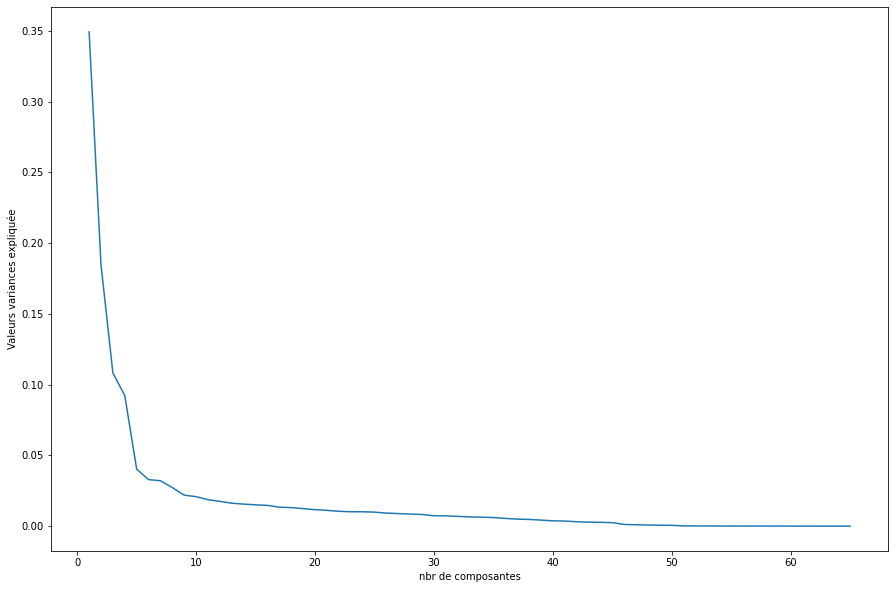

In [814]:
# variance expliquée en fonction du nombre de composante : graphique : 
plt.figure(figsize = (15,10))
plt.plot(np.arange(1,66), pca.explained_variance_)
plt.xlabel('nbr de composantes')
plt.ylabel('Valeurs variances expliquée')
plt.savefig('var_expliquee_PCA_salaire.png', facecolor='w')
plt.show()

# on note une cassure , un coude à partir pour 2 composantes. Ceci est assez cool en vue de la mise en place de Kmeans

65


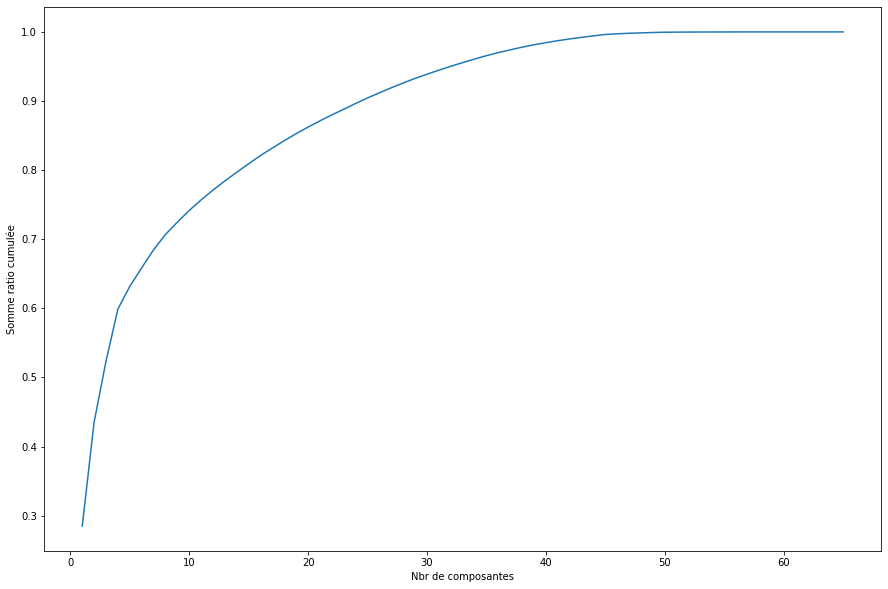

In [815]:
# on vérifie avec la somme cumulée du ratio de la varianlce expliquée en fonction du nombre de composantes

# calcu des ratios : 
print(len(pca.explained_variance_ratio_))

# graph de la somme cumulée des ratios en fonction du nbr de composantes

plt.figure(figsize =(15,10))
plt.plot(np.arange(1,66), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nbr de composantes')
plt.ylabel('Somme ratio cumulée')
plt.show()

C:\Users\SIDIOM~1\AppData\Local\Temp/ipykernel_61420/1255055476.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'Autres'], autopct='%1.3f%%', radius=2, labeldistance=1.2)


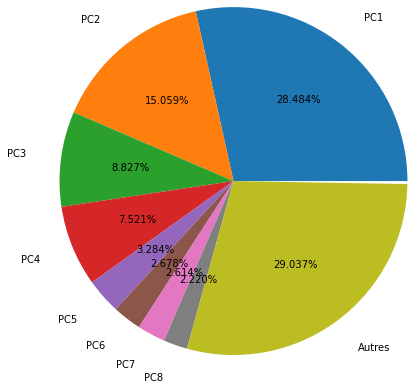

In [816]:
L1 = list(pca.explained_variance_ratio_[0:8])
L1
L1.append(sum(pca.explained_variance_ratio_[8:46]))
L1

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'Autres'], autopct='%1.3f%%', radius=2, labeldistance=1.2)
#plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Autres'], autopct='%1.3f%%', radius=2, labeldistance=1.2)
plt.show()

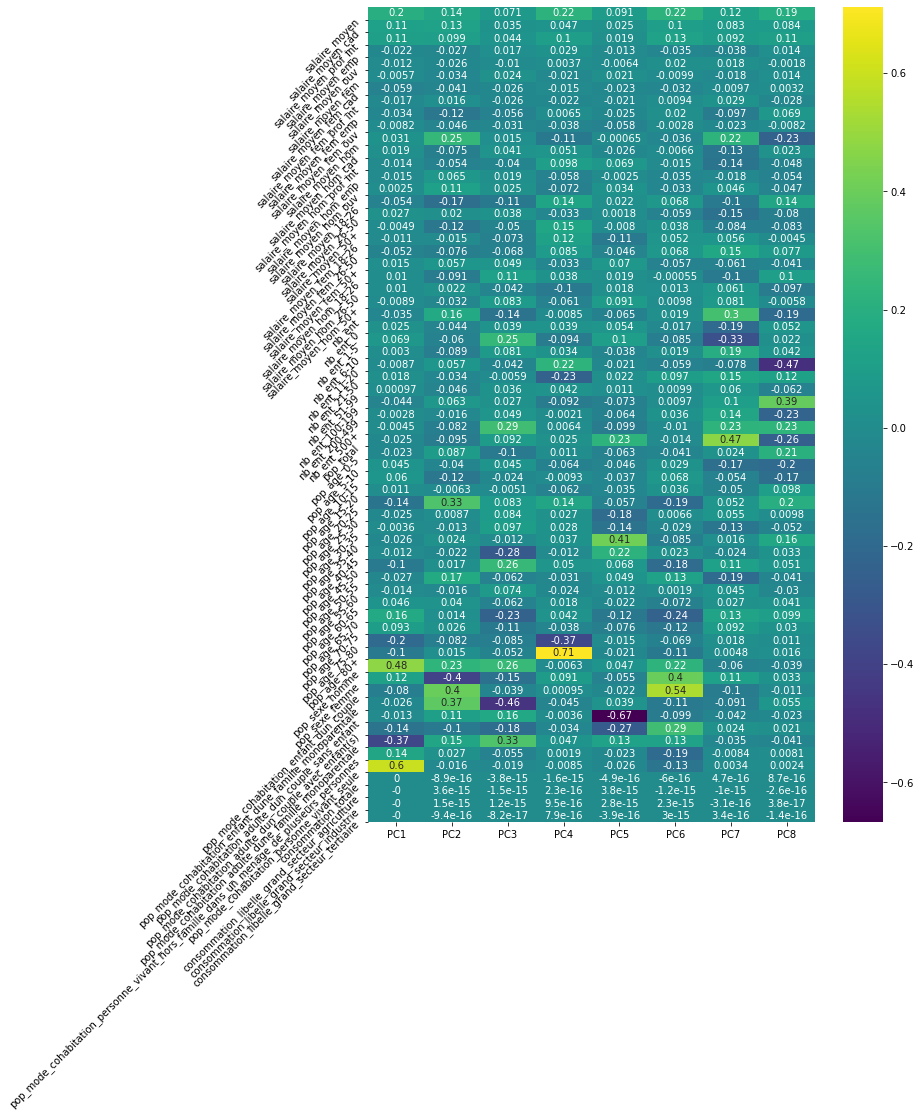

In [817]:
# Afficher les coeficients de corrélations de chaque variables
# avec les deux premières variables  = (les 2 premiers axes)
# grâce à l'attribut components_ de pca

#Comp_PCA = pd.DataFrame({'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1], 'PC3': pca.components_[:, 2], 'PC4': pca.components_[:, 3]})
Comp_PCA = pd.DataFrame({'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1], 'PC3': pca.components_[:, 2], 'PC4': pca.components_[:, 3],
                        'PC5': pca.components_[:, 4], 'PC6': pca.components_[:, 5], 'PC7': pca.components_[:, 6], 'PC8': pca.components_[:, 7]})


plt.figure(figsize=(10, 15))

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')
plt.yticks(np.arange(1,66), df_lyon_num.columns, rotation = 45)
plt.savefig('heatmap_PCA_salaire.png', facecolor='w')
plt.show()

In [818]:
df_lyon_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1004 to 74311
Data columns (total 65 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   salaire_moyen                                                                             660 non-null    float64
 1   salaire_moyen_cad                                                                         660 non-null    float64
 2   salaire_moyen_prof_int                                                                    660 non-null    float64
 3   salaire_moyen_emp                                                                         660 non-null    float64
 4   salaire_moyen_ouv                                                                         660 non-null    float64
 5   salaire_moyen_fem                                   

pop_mode_cohabitation_personne_vivant_seule est la variable  plus corrélées avec la 1er composante principales puis au 2ème niveau on distingue les variables pop-sexe_homme et pop_mode_cohabitation_adulte_dune_famille_monoparentale (corrélation négative)

Les variables pop_sexe_femme et pop_mode_cohabitation_enfant_dun_couple  sont les plus corrélées  avec la 2ème composante

La pop_mode_cohabitation_enfant_dune_famille_monoparentale est la plus corrélées avec la 3ème composante.

Ensuite on distingue une corrélation significativement forte de la variable pop_age_80+ avec la 4ème composante.


In [819]:
n_variable = 65


In [820]:
pca_lyon_kmeans = pd.DataFrame({"Axe " + str(i + 1): coord[:,i] for i in range(n_variable)})

C:\Users\SidiOmarELGHAZI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


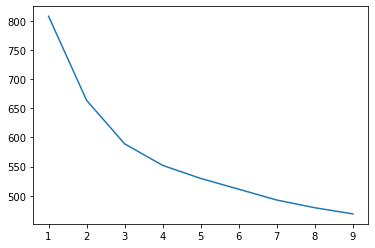

In [821]:
L = []
for i in range (1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_lyon_kmeans)
    L.append(kmeans.inertia_)

plt.plot(range(1,10), L)
plt.show()

La courbe montre que 3 clusters 

In [822]:
n_cluster = 3
kmeans = KMeans(n_clusters = n_cluster)

# entrainement sur Comp_PCA
kmeans.fit(pca_lyon_kmeans)

# Prédictions
y_kmeans = kmeans.predict(pca_lyon_kmeans)
print(len(y_kmeans))

# coordonnées des centres des clusters
kmeans.cluster_centers_

x_cluster_centers = kmeans.cluster_centers_[:,0]
y_cluster_centers = kmeans.cluster_centers_[:,1]

print(x_cluster_centers)
print(y_cluster_centers)

print("la valeur de l'inertie por le modèle est : ", kmeans.inertia_)
print(len(y_kmeans))

660
[ 0.07881495  0.89847984 -0.58798382]
[-0.27196508  0.34252291  0.25877909]
la valeur de l'inertie por le modèle est :  588.9634402923808
660


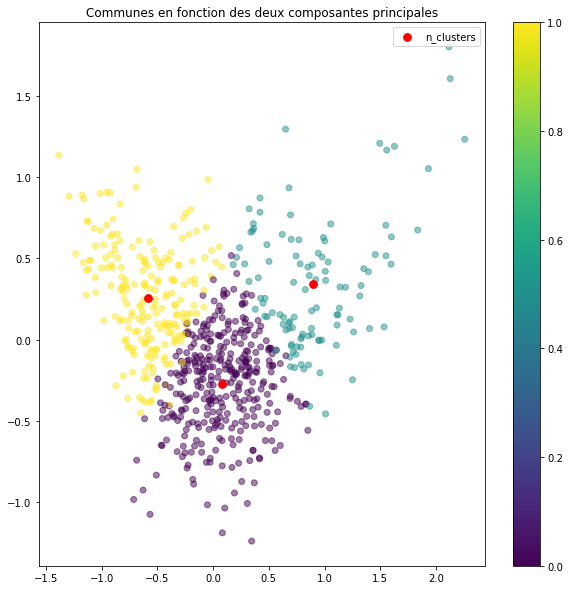

In [823]:
# représentation graphique
plt.figure(figsize = (10,10))
plt.scatter(pca_lyon_kmeans['Axe 1'], pca_lyon_kmeans['Axe 2'], alpha = 0.5, c = y_kmeans)
plt.scatter(x_cluster_centers, y_cluster_centers, c = 'red', s = 60, label = 'n_clusters')
plt.title("Communes en fonction des deux composantes principales")
plt.legend()
plt.colorbar()
plt.savefig('Kmeans_PCA_salaire.png', facecolor='w')
plt.show()

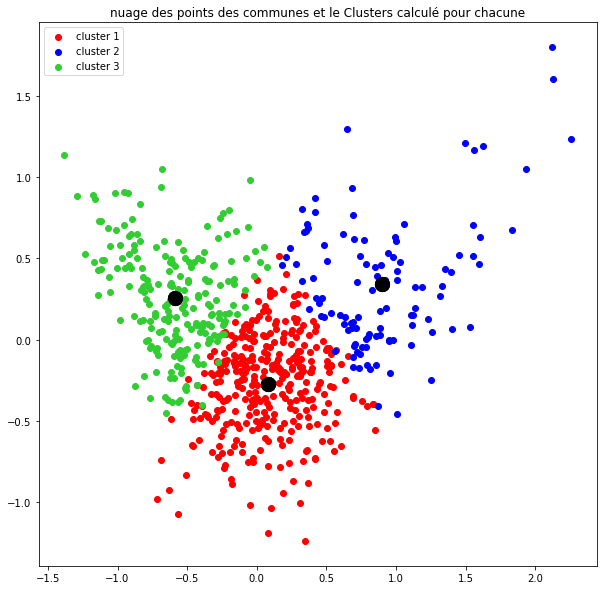

In [824]:
# 2ème méthode pour la représentation graphique
plt.figure(figsize = (10,10))
label=['cluster 1', 'cluster 2', 'cluster 3']
for couleur,k in zip(['red','blue','limegreen'],[0,1,2]):
    plt.scatter(pca_lyon_kmeans['Axe 1'][kmeans.labels_==k],pca_lyon_kmeans['Axe 2'][kmeans.labels_==k],c=couleur, label=label[k])
    plt.scatter(x_cluster_centers, y_cluster_centers, c = 'black', s = 200)

plt.title("nuage des points des communes et le Clusters calculé pour chacune")
plt.legend()
plt.show() 

In [825]:
""" 
# 2ème méthode pour la représentation graphique avec 4 clusters

n_cluster = 4
kmeans = KMeans(n_clusters = n_cluster)

# entrainement sur Comp_PCA
kmeans.fit(pca_lyon_kmeans)

# Prédictions
y_kmeans = kmeans.predict(pca_lyon_kmeans)
print(len(y_kmeans))

# coordonnées des centres des clusters
kmeans.cluster_centers_

x_cluster_centers = kmeans.cluster_centers_[:,0]
y_cluster_centers = kmeans.cluster_centers_[:,1]

print(x_cluster_centers)
print(y_cluster_centers)

print("la valeur de l'inertie por le modèle est : ", kmeans.inertia_)
print(len(y_kmeans))
""" 


' \n# 2ème méthode pour la représentation graphique avec 4 clusters\n\nn_cluster = 4\nkmeans = KMeans(n_clusters = n_cluster)\n\n# entrainement sur Comp_PCA\nkmeans.fit(pca_lyon_kmeans)\n\n# Prédictions\ny_kmeans = kmeans.predict(pca_lyon_kmeans)\nprint(len(y_kmeans))\n\n# coordonnées des centres des clusters\nkmeans.cluster_centers_\n\nx_cluster_centers = kmeans.cluster_centers_[:,0]\ny_cluster_centers = kmeans.cluster_centers_[:,1]\n\nprint(x_cluster_centers)\nprint(y_cluster_centers)\n\nprint("la valeur de l\'inertie por le modèle est : ", kmeans.inertia_)\nprint(len(y_kmeans))\n'

In [826]:
""" 
plt.figure(figsize = (10,10))
label=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for couleur,k in zip(['red','blue','limegreen', 'yellow'],[0,1,2,3]):
    plt.scatter(pca_lyon_kmeans['Axe 1'][kmeans.labels_==k],pca_lyon_kmeans['Axe 2'][kmeans.labels_==k],c=couleur, label=label[k])
    plt.scatter(x_cluster_centers, y_cluster_centers, c = 'black', s = 200)

plt.title("nuage des points des communes et le Clusters calculé pour chacune")
plt.legend()
plt.savefig('Kmeans_PCA_salaire.png', facecolor='w')
plt.show() 
""" 

' \nplt.figure(figsize = (10,10))\nlabel=[\'cluster 1\', \'cluster 2\', \'cluster 3\', \'cluster 4\']\nfor couleur,k in zip([\'red\',\'blue\',\'limegreen\', \'yellow\'],[0,1,2,3]):\n    plt.scatter(pca_lyon_kmeans[\'Axe 1\'][kmeans.labels_==k],pca_lyon_kmeans[\'Axe 2\'][kmeans.labels_==k],c=couleur, label=label[k])\n    plt.scatter(x_cluster_centers, y_cluster_centers, c = \'black\', s = 200)\n\nplt.title("nuage des points des communes et le Clusters calculé pour chacune")\nplt.legend()\nplt.savefig(\'Kmeans_PCA_salaire.png\', facecolor=\'w\')\nplt.show() \n'

pop_mode_cohabitation_personne_vivant_seule est la variable plus corrélées avec la 1er composante principales puis au 2ème niveau on distingue les variables pop-sexe_homme et pop_mode_cohabitation_adulte_dune_famille_monoparentale (corrélation négative)

Les variables pop_sexe_femme et pop_mode_cohabitation_enfant_dun_couple sont les plus corrélées avec la 2ème composante

La pop_mode_cohabitation_enfant_dune_famille_monoparentale est la plus corrélées avec la 3ème composante.

Ensuite on distingue une corrélation significativement forte de la variable pop_age_80+ avec la 4ème composante.

In [827]:
#consommation_totale = df_lyon['consommation_totale']
#adulte_dun_couple_sans_enfant = df_lyon['pop_mode_cohabitation_adulte_dun_couple_sans_enfant']
#entreprise_0_sal = df_lyon['nb_ent_0']
#famille_monoparentale = df_lyon['pop_mode_cohabitation_adulte_dune_famille_monoparentale']
#nb_ent = df_lyon['nb_ent']
#population_total =df_lyon['pop_total']



pca_lyon_kmeans = pd.DataFrame({
                                 'distance_to_Lyon' : distance_lyon,
                                 'nom_commune' : nom_commune,
                                 'latitude' : latitude,
                                 'longitude' : longitude,
                                 'cluster' : y_kmeans,
                                'pop_mode_cohabitation_personne_vivant_seule': df_lyon['pop_mode_cohabitation_personne_vivant_seule'],
                                'pop_mode_cohabitation_adulte_dune_famille_monoparentale' : df_lyon['pop_mode_cohabitation_adulte_dune_famille_monoparentale'],
                                'pop_mode_cohabitation_enfant_dune_famille_monoparentale': df_lyon['pop_mode_cohabitation_enfant_dune_famille_monoparentale'],
                                'pop_mode_cohabitation_enfant_dun_couple' : df_lyon['pop_mode_cohabitation_enfant_dun_couple']
                                 })

In [828]:
import folium
from folium.plugins import FastMarkerCluster



my_map_cluster = folium.Map(location = [45.750000, 4.850000], tiles='OpenStreetMap', zoom_start = 10)
folium.Marker(location =[45.750000, 4.850000] ).add_to(my_map_cluster) # Lyon
folium.Marker(location =[45.166667, 5.716667] ).add_to(my_map_cluster) # Grenoble
folium.Marker(location =[45.433333, 4.400000] ).add_to(my_map_cluster) # Saint-Etienne
folium.Marker(location =[45.783333, 3.083333] ).add_to(my_map_cluster) # Clermont-Ferrand
folium.Marker(location =[44.933333, 4.900000] ).add_to(my_map_cluster) # Valence



def add_marker(row):
    if row['cluster']==0:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =3 , 
                color = 'red', alpha = 0.4, popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
    elif row['cluster'] == 1:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =3 , 
                color = 'blue',  alpha = 0.4, popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
    elif row['cluster'] == 2:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =3 , 
                color = 'limegreen',  alpha = 0.4, popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
#     elif row['cluster'] == 3:
#         marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =7 , 
#                 color = 'green',  popup = row['cluster'])
#         marker.add_to(my_map_cluster)
        
#     elif row['cluster'] == 4:
#         marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =5 , 
#                 color = 'lime',  popup = row['cluster'])
#         marker.add_to(my_map_cluster)
        
    else:
        marker = folium.CircleMarker([row['latitude'], row['longitude']], radius =4, 
                color = 'yellow',  popup = row['cluster'])
        marker.add_to(my_map_cluster)
        
        
pca_lyon_kmeans.apply(add_marker, axis = 1)
        
    

my_map_cluster

In [830]:
D = pd.DataFrame({"Axe " + str(i + 1): coord[:,i] for i in range(n_variable)})
D['cluster'] = y_kmeans
D
gb = D.groupby(kmeans.labels_)
gb.mean().round(2)

,Axe 1,Axe 2,Axe 3,Axe 4,Axe 5,Axe 6,Axe 7,Axe 8,Axe 9,Axe 10,Axe 11,Axe 12,Axe 13,Axe 14,Axe 15,Axe 16,Axe 17,Axe 18,Axe 19,Axe 20,Axe 21,Axe 22,Axe 23,Axe 24,Axe 25,Axe 26,Axe 27,Axe 28,Axe 29,Axe 30,Axe 31,Axe 32,Axe 33,Axe 34,Axe 35,Axe 36,Axe 37,Axe 38,Axe 39,Axe 40,Axe 41,Axe 42,Axe 43,Axe 44,Axe 45,Axe 46,Axe 47,Axe 48,Axe 49,Axe 50,Axe 51,Axe 52,Axe 53,Axe 54,Axe 55,Axe 56,Axe 57,Axe 58,Axe 59,Axe 60,Axe 61,Axe 62,Axe 63,Axe 64,Axe 65,cluster
0,0.08,-0.27,-0.06,0.02,0.01,-0.01,-0.00,0.0,-0.00,-0.00,-0.00,0.00,0.00,0.01,0.01,-0.00,0.00,-0.00,-0.01,0.0,-0.0,0.0,-0.0,0.0,-0.00,-0.0,0.0,0.00,0.0,-0.00,-0.00,0.00,-0.00,-0.0,0.00,-0.0,-0.00,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.00,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
1,0.90,0.34,0.10,-0.03,-0.01,0.01,-0.01,-0.0,0.01,0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,0.00,0.01,0.0,0.0,0.0,0.0,-0.0,0.01,0.0,-0.0,0.01,-0.0,0.01,0.01,0.01,0.01,0.0,-0.01,-0.0,0.01,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.01,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0
2,-0.59,0.26,0.04,-0.01,-0.00,0.01,0.01,-0.0,0.00,0.00,0.00,-0.00,0.00,-0.01,-0.01,0.01,0.00,0.01,0.01,-0.0,0.0,-0.0,0.0,0.0,-0.00,0.0,-0.0,-0.01,-0.0,-0.00,0.00,-0.00,-0.00,0.0,0.00,0.0,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,2.0


Analyse des clusters :

Cluster 1

le cluster 1 est inversement influencé par l'axe 1 qui est aussi inversement influencé par la variable pop_mode_cohabitation_adulte_dune_famille_monoparentale.
On peut déduire que le mode de famille monoparentale est probablement plus présent dans ce cluster.
d'ailleurs l'axe 2 influence aussi ce cluster à travers l'autre mode de famille mono parentale (la variable pop_mode_cohabitation_enfant_dune_famille_monoparentale)
cet analyse est probablement confirmé aussi par les points rouges sur la carte qui montrent des communes se situant principalement dans les grandes agglomérations et à travers les axes importants entre les grandes villes.

Cluster 2

l'axe 1 détermine largement le cluster 2
la variable "les personnes vivants seules" est la plus corrélée avec l'axe 1, 
on peut déduire que le cluster 1 est déterminé en majorité par les personnes vivants seules.
on trouve ce mode de vie plus dans les grandes villes et les grandes agglomérations ((les points bleu sur la carte).

Cluster 3

L'axe 2 semble celui qui détermine plus le cluster 1 mais il est difficile de déduire quelles sont les variables influentes.
Sur la carte (les points verts), on distingue bien ces communes qui se trouvent 
